In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')
import torch
from utils.analysis_from_interaction import *
from language_analysis_local import TopographicSimilarityConceptLevel, encode_target_concepts_for_topsim
import os
if not os.path.exists('analysis'):
    os.makedirs('analysis')
#import plotly.express as px

In [24]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

In [2]:
datasets = ['(3,4)',]
n_values = [4,]
n_attributes = [3,]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

In [3]:
context_unaware = True # whether original or context_unaware simulations are evaluated
no_cost = False # set to True to consider baselines without a cost
if context_unaware and not no_cost:
    setting = 'context_unaware'
elif context_unaware and no_cost:
    setting = 'no_cost_context_unaware'
elif not context_unaware and not no_cost:
    setting = 'context_aware'
else:
    setting = 'no_cost_context_aware'

## training

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


TypeError: 'NoneType' object is not subscriptable

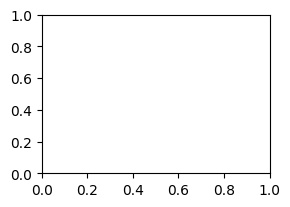

In [4]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=True, length_cost=True)
plot_training_trajectory(all_accuracies['train_acc'], all_accuracies['val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

In [ ]:
len(all_accuracies['cu_zs_specific_val_message_length'][0][0])

In [ ]:
len(all_accuracies['train_acc'][0][0])

In [7]:
len(np.transpose(all_accuracies['train_acc']))

300

In [6]:
type(all_accuracies['train_acc'][0][0])

numpy.ndarray

In [7]:
type(all_accuracies['cu_zs_specific_val_message_length'][0][0])

tuple

In [15]:
len(np.transpose(all_accuracies['cu_zs_specific_val_message_length']))

5

5 5


ValueError: x and y must have same first dimension, but have shapes (97,) and (5,)

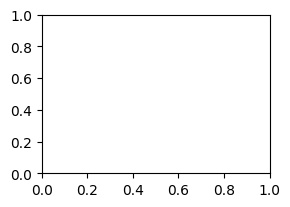

In [5]:
plot_training_trajectory(results_train=all_accuracies['train_acc'], results_val=None, ylim=(0, 30), xlim=(0, 100), steps=(1, 1), message_length_train=all_accuracies['cu_zs_specific_train_message_length'], 
train_only=True, message_length_plot=True, n_epochs=300, titles=('D(3,4)',), plot_indices=(1,))

## final accuracies 

In [8]:
all_accuracies = load_accuracies(paths, n_runs=5, val_steps=1, zero_shot=True, context_unaware=True, length_cost=True)
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'], 
#              all_accuracies['zs_acc_objects'], all_accuracies['zs_acc_abstraction']]
#accuracies = [all_accuracies['train_acc'], all_accuracies['val_acc'],
#              all_accuracies['cu_train_acc'], all_accuracies['cu_val_acc']]
zero_shot_accs_specific = all_accuracies['zs_specific_test_acc']
zero_shot_accs_generic = all_accuracies['zs_generic_test_acc']
cu_zs_accs_specific = all_accuracies['cu_zs_specific_test_acc']
cu_zs_accs_generic = all_accuracies['cu_zs_generic_test_acc']

In [9]:
for i, dataset in enumerate(zero_shot_accs_specific):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(cu_zs_accs_specific[i].mean(), 3)) + " (" + str(round(cu_zs_accs_specific[i].std(), 3)) + ")")

(standard) Mean test accuracy over runs: 0.911 (0.015)
(context-unaware) Mean test accuracy over runs: 0.928 (0.009)


In [10]:
for i, dataset in enumerate(zero_shot_accs_generic):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(cu_zs_accs_generic[i].mean(), 3)) + " (" + str(round(cu_zs_accs_generic[i].std(), 3)) + ")")

(standard) Mean test accuracy over runs: 0.732 (0.022)
(context-unaware) Mean test accuracy over runs: 0.688 (0.042)


IndexError: index 1 is out of bounds for axis 0 with size 1

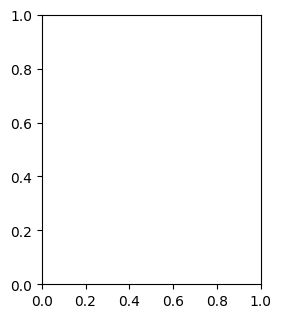

In [11]:
accuracies = [all_accuracies['zs_specific_test_acc'], all_accuracies['zs_generic_test_acc'],
              all_accuracies['cu_zs_specific_test_acc'], all_accuracies['cu_zs_generic_test_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='zero-shot test accuracies', 
             titles=('context-aware \nspecific', 'context-aware \ngeneric', 'context-unaware \nspecific', 'context-unaware \ngeneric'),
             fontsize=17)

In [5]:
zs_specific_val_ml = all_accuracies['zs_specific_val_message_length']
zs_generic_val_ml = all_accuracies['zs_generic_val_message_length']
cu_zs_specific_val_ml = all_accuracies['cu_zs_specific_val_message_length']
cu_zs_generic_val_ml = all_accuracies['cu_zs_generic_val_message_length']

In [8]:
zs_generic_val_ml

array([[(1.0, 1.8948863744735718, 6.252840995788574, 9.637784004211426, 4.4758524894714355, 3.7428977489471436, 4.4303975105285645, 5.6875, 6.517045497894287, 5.6789774894714355, 6.592329502105713, 6.313920497894287, 6.228693008422852, 5.998579502105713, 6.436079502105713, 6.478693008422852, 6.377840995788574, 6.169034004211426, 6.401988506317139, 6.951704502105713, 6.9914774894714355, 7.029829502105713, 7.019886493682861, 7.181818008422852, 7.471590995788574, 7.25, 7.25, 7.495738506317139, 7.5085225105285645, 7.795454502105713, 7.907670497894287, 7.666193008422852, 8.011363983154297, 7.619318008422852, 7.552556991577148, 8.259943008422852, 7.8664774894714355, 8.335227012634277, 7.8196024894714355, 7.748579502105713, 7.044034004211426, 7.887784004211426, 7.933238506317139, 7.487215995788574, 7.8196024894714355, 7.561079502105713, 7.453125, 7.767045497894287, 7.448863506317139, 7.734375, 7.440340995788574, 7.811079502105713, 7.4772725105285645, 8.247159004211426, 7.778409004211426, 8.25

In [12]:
for i, dataset in enumerate(zs_generic_val_ml):
    print("(standard) Mean test accuracy over runs: " + str(round(dataset.mean(), 3)) + " (" + str(round(dataset.std(), 3)) + ")")
    print("(context-unaware) Mean test accuracy over runs: " + str(round(zs_generic_val_ml[i].mean(), 3)) + " (" + str(round(zs_generic_val_ml[i].std(), 3)) + ")")

TypeError: type numpy.ndarray doesn't define __round__ method

### See which messages are produced for which concepts

In [69]:
setting = 'length_cost/context_aware/zero_shot/specific' 
# 63 generic, 95 specific context unaware
n_epochs = 95 

In [68]:
# go through all datasets
for i, d in enumerate(datasets):
    # select first run
    path_to_run = paths[i] + '/' + str(setting) + '/' + str(0) + '/'
    path_to_interaction_train = (path_to_run + 'interactions/train/epoch_' + str(n_epochs) + '/interaction_gpu0')
    path_to_interaction_val = (path_to_run + 'interactions/validation/epoch_' + str(n_epochs) + '/interaction_gpu0')
    interaction = torch.load(path_to_interaction_train)
    print(path_to_interaction_train)

    messages = interaction.message.argmax(dim=-1)
    messages = [msg.tolist() for msg in messages]
    sender_input = interaction.sender_input
    print(sender_input.shape)
    n_targets = int(sender_input.shape[1] / 2)
    # get target objects and fixed vectors to re-construct concepts
    target_objects = sender_input[:, :n_targets]
    target_objects = k_hot_to_attributes(target_objects, n_values[i])
    # concepts are defined by a list of target objects (here one sampled target object) and a fixed vector
    (objects, fixed) = retrieve_concepts_sampling(target_objects, all_targets=True)
    concepts = list(zip(objects, fixed))

    # get distractor objects to re-construct context conditions
    distractor_objects = sender_input[:, n_targets:]
    distractor_objects = k_hot_to_attributes(distractor_objects, n_values[i])
    context_conds = retrieve_context_condition(objects, fixed, distractor_objects)

    # get random qualitative samples
    #fixed_index = random.randint(0, n_attributes[i]-1) # define a fixed index for the concept
    #n_fixed = random.randint(1, n_attributes[i]) # how many fixed attributes?
    n_fixed = 1
    fixed_indices = random.sample(range(0, n_attributes[i]), k=n_fixed) # select which attributes are fixed
    #fixed_indices = [0, 1, 2, 3]
    fixed_value = random.randint(0, n_values[i]-1) # define a fixed value for this index
    fixed_values = random.choices(range(0, n_values[i]), k=n_fixed)
    #fixed_values = [0, 0, 0, 3]
    print(n_fixed, fixed_indices, fixed_values)
    #index_threshold = 20000 # optional: define some index threshold to make sure that examples are not taken from the beginning of training
    # TODO: adapt this loop such that multiple indices can be fixed
    all_for_this_concept = []
    for idx, (t_objects, t_fixed) in enumerate(concepts):
        #if sum(t_fixed) == 1 and t_fixed[fixed_index] == 1:# and idx > index_threshold:
        if sum(t_fixed) == n_fixed and all(t_fixed[fixed_index] == 1 for fixed_index in fixed_indices):
            for t_object in t_objects:
                if all(t_object[fixed_index] == fixed_values[j] for j, fixed_index in enumerate(fixed_indices)):
                    all_for_this_concept.append((idx, t_object, t_fixed, context_conds[idx], messages[idx]))
                    fixed = t_fixed
    if len(all_for_this_concept) > 0:
        #sample = random.sample(all_for_this_concept, 20)
        sample = all_for_this_concept
        column_names = ['game_nr', 'object', 'fixed indices', 'context condition', 'message']
        df = pd.DataFrame(sample, columns=column_names)
        df.to_csv(
            'analysis/quali_' + str(d) + '_' + str(setting) + '_' + str(sample[0][1]) + ',' + str(fixed) + 'all.csv',
            index=False)
        print('saved ' + 'analysis/quali_' + str(d) + '_' + str(setting) + '_' + str(sample[0][1]) + ',' + str(
            fixed) + 'all.csv')
    else:
        raise ValueError("sample for dataset " + str(d) + " could not be generated")

results/(3,4)_game_size_10_vsf_3/length_cost/context_unaware/zero_shot/specific/0/interactions/train/epoch_95/interaction_gpu0
torch.Size([810, 20, 12])
1 [1] [0]
saved analysis/quali_(3,4)_length_cost/context_unaware/zero_shot/specific_[2. 0. 1.],[0. 1. 0.]all.csv
